In [3]:
#Esto es un cuaderno, para realizar el proyecto paso a paso

Importamos librerias necesarias en la limpieza de datos (no olvidar instalar las libreras necesarias con pip install .. antes de importarlas)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OrdinalEncoder

import folium
import plotly.express as px


Leemos el primer csv, y lo asignamos como nuestro dataframe. Imprimimos las primeras lineas para tener una idea del dataframe

In [5]:
df_ca=pd.read_csv("commercial_activity_df.csv")
print(df_ca.head())

   Unnamed: 0   pk_cid pk_partition  entry_date entry_channel  \
0           0  1375586   2018-01-28  2018-01-12           KHL   
1           1  1050611   2018-01-28  2015-08-10           KHE   
2           2  1050612   2018-01-28  2015-08-10           KHE   
3           3  1050613   2018-01-28  2015-08-10           KHD   
4           4  1050614   2018-01-28  2015-08-10           KHE   

   active_customer             segment  
0              1.0   02 - PARTICULARES  
1              0.0  03 - UNIVERSITARIO  
2              0.0  03 - UNIVERSITARIO  
3              0.0  03 - UNIVERSITARIO  
4              1.0  03 - UNIVERSITARIO  


Obtenemos informacion general del dataframe con  los metodos .describe() e .info()

In [6]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 7 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   pk_cid           int64  
 2   pk_partition     object 
 3   entry_date       object 
 4   entry_channel    object 
 5   active_customer  float64
 6   segment          object 
dtypes: float64(1), int64(2), object(4)
memory usage: 318.5+ MB


Vemos que existe una columna de numeros, que coincide con el numero de los registros, pero que no es el indice, llamada Unnamed. Vamos a cambiar el nombre a esta columna y asignarla como indice.

In [7]:
n_index = 'Index'
df_ca = df_ca.rename_axis(n_index).reset_index()

In [8]:
df_ca.set_index('Index', inplace=True)

Comprobamos que el indice ahora es correcto, pero nos sobra la columna Unnamed, la borramos con del

In [9]:
print(df_ca.head())

       Unnamed: 0   pk_cid pk_partition  entry_date entry_channel  \
Index                                                               
0               0  1375586   2018-01-28  2018-01-12           KHL   
1               1  1050611   2018-01-28  2015-08-10           KHE   
2               2  1050612   2018-01-28  2015-08-10           KHE   
3               3  1050613   2018-01-28  2015-08-10           KHD   
4               4  1050614   2018-01-28  2015-08-10           KHE   

       active_customer             segment  
Index                                       
0                  1.0   02 - PARTICULARES  
1                  0.0  03 - UNIVERSITARIO  
2                  0.0  03 - UNIVERSITARIO  
3                  0.0  03 - UNIVERSITARIO  
4                  1.0  03 - UNIVERSITARIO  


In [10]:
del(df_ca["Unnamed: 0"])

In [11]:
print(df_ca.head())

        pk_cid pk_partition  entry_date entry_channel  active_customer  \
Index                                                                    
0      1375586   2018-01-28  2018-01-12           KHL              1.0   
1      1050611   2018-01-28  2015-08-10           KHE              0.0   
2      1050612   2018-01-28  2015-08-10           KHE              0.0   
3      1050613   2018-01-28  2015-08-10           KHD              0.0   
4      1050614   2018-01-28  2015-08-10           KHE              1.0   

                  segment  
Index                      
0       02 - PARTICULARES  
1      03 - UNIVERSITARIO  
2      03 - UNIVERSITARIO  
3      03 - UNIVERSITARIO  
4      03 - UNIVERSITARIO  


Tambien cambiaremos las columnas "pk_partition" y "entry_date" a formato fecha

In [12]:
for i in ["pk_partition","entry_date"]:
    df_ca[i]=pd.to_datetime(df_ca[i],format='%Y-%m-%d',errors="coerce")


### CONSULTAR PORQUE ESTO ME METE NULOS, CUANDO NO LOS HABIA"


Aparece un error al cambiar el formato de las fechas, vamos a tratarlo y volveremos a ejecutarlo


In [13]:
df_ca.loc[688]

pk_cid                         1051705
pk_partition       2018-01-28 00:00:00
entry_date         2015-08-14 00:00:00
entry_channel                      KHD
active_customer                    0.0
segment             03 - UNIVERSITARIO
Name: 688, dtype: object

In [14]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 318.5+ MB


Comenzamos ahora la busqueda de nulos


In [15]:
df_ca.isnull().any()

pk_cid             False
pk_partition       False
entry_date          True
entry_channel       True
active_customer    False
segment             True
dtype: bool

In [16]:
df_ca["entry_date"].isna().sum()

6413

In [17]:
df_ca.dropna(subset = ["entry_date"], inplace=True)

Existen dos columnas con nulos, vamos a ver cuantos son

In [50]:
df_ca.isnull().sum()

pk_cid                  0
pk_partition            0
entry_date              0
entry_channel      132083
active_customer         0
segment            132923
dtype: int64

In [19]:
df_ca.head(10)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
Index,,,,,,
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO
5,1050615,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
6,1050616,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
7,1050617,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO
8,1050619,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO


Ahora contaremos los posibles duplicados que haya, si los hay

In [20]:
df_ca[df_ca.duplicated()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pk_cid           0 non-null      int64         
 1   pk_partition     0 non-null      datetime64[ns]
 2   entry_date       0 non-null      datetime64[ns]
 3   entry_channel    0 non-null      object        
 4   active_customer  0 non-null      float64       
 5   segment          0 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 0.0+ bytes


Ahora echaremos un vistazo al dataframe con un histrograma

array([[<Axes: title={'center': 'pk_cid'}>,
        <Axes: title={'center': 'pk_partition'}>],
       [<Axes: title={'center': 'entry_date'}>,
        <Axes: title={'center': 'active_customer'}>]], dtype=object)

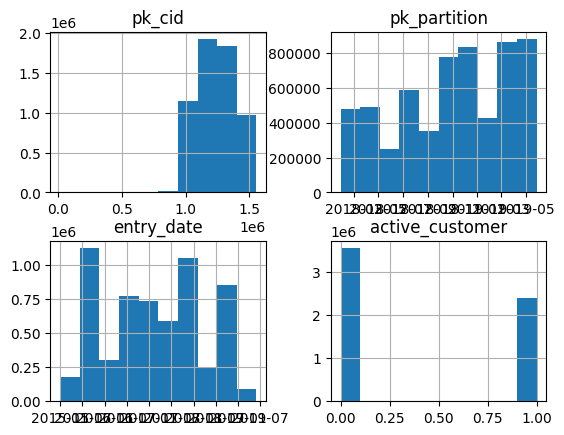

In [21]:
df_ca.hist()

Vemos la distribucion de entry channel, y eliminaremos todas las filas que contengan un valor de "entry_channel" inferior al 1% del total de registros del dataset (aprox 6M -> 0.1 % -> 6k)

In [22]:
df_ca["entry_channel"].value_counts()

entry_channel
KHE    3113947
KFC     889944
KHQ     590280
KAT     415870
KHK     230182
        ...   
KES         11
KEJ          8
KHS          5
KDA          2
KFP          2
Name: count, Length: 67, dtype: int64

In [35]:
def obten_lista_eliminar(dataset, columna, umbral):
  lista_borrar= []  
  tabla=dataset[columna].value_counts().reset_index()
  print(tabla)
  for i in range(0,len(tabla)):
    if (tabla.iloc[i]["count"]) < umbral:
      lista_borrar.append(tabla.iloc[i][columna])
  return lista_borrar


In [38]:
lista_eliminar_entry = obten_lista_eliminar(df_ca, "entry_channel", 6000)


   entry_channel    count
0            KHE  3113947
1            KFC   889944
2            KHQ   590280
3            KAT   415870
4            KHK   230182
..           ...      ...
62           KES       11
63           KEJ        8
64           KHS        5
65           KDA        2
66           KFP        2

[67 rows x 2 columns]


In [39]:
def eliminar_lista_df(dataset, columna, lista_eliminar):
  dataset.drop(dataset[dataset[columna].isin(lista_eliminar)].index, inplace=True)




In [41]:
eliminar_lista_df(df_ca,"entry_channel",lista_eliminar_entry)

In [48]:
df_ca["entry_channel"].value_counts()

entry_channel
KHE    3113947
KFC     889944
KHQ     590280
KAT     415870
KHK     230182
KHM     173527
KHN     107919
KFA      78910
KHD      75130
RED      60560
KHL      41736
KHF      20657
KHO       8238
Name: count, dtype: int64